<a href="https://colab.research.google.com/github/Rashid1995/DataExploration/blob/main/MNIST_number_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# Load the mnist data from the tensorflow api
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 60k training data along with the labels to the correspond (y_train)
# The image size is 28 x 28 in pixel size
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

Corresponding label:  5


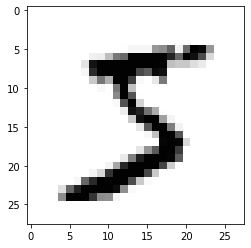

In [15]:
# To visualise you can use matplotlib to each number in the training set
import matplotlib.pyplot as plt
%matplotlib inline
print('Corresponding label: ', y_train[0])
# The argument cmap would print out in grey scale as this is the type of data we currently have
plt.imshow(x_train[0], cmap='Greys')

In [16]:
# To be able to use the dataset in Keras API, we need 4-dims NumPy arrays. However, 
# as we see above, our array is 3-dims. In addition, we must normalize our data as it 
# is always required in neural network models. We can achieve this by dividing the RGB codes 
# to 255 (which is the maximum RGB code minus the minimum RGB code)

# Here we are reshaping the data in order to suit the model requirements
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28,28,1)

# conver the values to float so we can get decimal values when we divide
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalise
x_train = x_train/255
x_test = x_test/255

print('x_train shape: ', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape:  (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [19]:
# Sequential Model from Keras 
# and add Conv2D, MaxPooling, 
# Flatten, Dropout, and Dense layers. 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

# Define model
model = Sequential()

# Define first layer, this is the convultional layer
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

# This the maxpooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten into a vector to e fed into the fully connected dense layer to the classify now 
model.add(Flatten())

# Now the the dense layer with 128 nodes. We will use the relu activation function based on the neuron value to determine how activated a neuron is
model.add(Dense(128, activation = tf.nn.relu))

# Lets add the Dropout layer to aid in the overfitting, not taking inoput from 20% of the neuron values
model.add(Dropout(0.2))

# As there is the 10 outputs (0-9) for each number this layer will have a 10 neurons with a softmax activatio function
model.add(Dense(10, activation = tf.nn.softmax))


In [20]:
print(model)

In [23]:
# Lets fit and the optimze the nn we just created, select the adam optimzer, the loss and the metric
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
# Now to fit the model, give it the training data and set the number of loops to 10
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3592 - accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0837 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0539 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0410 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0307 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0258 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0206 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0167 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [25]:
# Now lets evaluate the model
# This model has a 98.44% accuracy which is good
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0662 - accuracy: 0.9845


[0.06622109562158585, 0.984499990940094]

Correspinding label:  7
Model predicted:  7


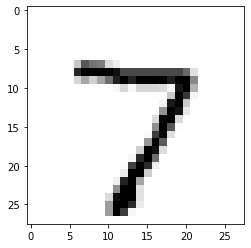

In [38]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
print('Correspinding label: ',y_test[0])
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('Model predicted: ', pred.argmax())